## 2D equations using symbolics. 

In [1]:
using Symbolics
using LinearAlgebra
using Latexify
using Plots

In [53]:
include("symbolics_ext.jl")

χaAB (generic function with 1 method)

In [3]:
D = Int64(2) #dimensions
L = (D+(D*(D+1)÷2))
println("D = $D, L = $L")
g = make_g(D)
ζ = rand(L)
p = ([1.0;1.0;1.0])

D = 2, L = 5


3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [4]:
Φ_new(ζ,p)

980.5836498013676

In [6]:
@variables vs[1:L] ps[1:3]
vst = [vs[i] for i ∈ 1:L]
vs_a = [vs[i] for i ∈ 1:D]
ΦaA = χaA(Φ_new(vs,ps),vs_a,vst);

In [7]:
ΦaA_exp = Symbolics.build_function(ΦaA,vs,ps);
ΦaA_f = eval(ΦaA_exp[1])

#11 (generic function with 1 method)

In [8]:
Φ0AB = χ0AB(Φ_new(vs,ps),vst);

In [9]:
Φ0AB_exp = Symbolics.build_function(Φ0AB,vs,ps);
Φ0AB_f = eval(Φ0AB_exp[1])

#13 (generic function with 1 method)

In [10]:
Φ0AB_f(ζ,p)

5×5 Matrix{Float64}:
 -3.99412e8   3.9854e8    5.99248e7  -5.99206e7   5.99248e7
  3.9854e8   -3.97736e8  -5.98415e7   5.98383e7  -5.98415e7
  5.99248e7  -5.98415e7  -5.33563e6   5.33562e6  -5.33563e6
 -5.99206e7   5.98383e7   5.33562e6  -5.33563e6   5.33562e6
  5.99248e7  -5.98415e7  -5.33563e6   5.33562e6  -5.33563e6

In [54]:
ΦaAB = χaAB(Φ_new(vs,ps),vst);
ΦaAB_exp = Symbolics.build_function(ΦaAB,vs,ps);
ΦaAB_f = eval(ΦaAB_exp[1])
ΦaAB_f(ζ,p)

5×5×2 Array{Float64, 3}:
[:, :, 1] =
 -2662.29  -2661.71  21961.6        21961.4        21961.6
 -2661.71  -2662.29  21961.4        21961.6        21961.4
 21961.6   21961.4       9.66306e5      9.66306e5      9.66306e5
 21961.4   21961.6       9.66306e5      9.66306e5      9.66306e5
 21961.6   21961.4       9.66306e5      9.66306e5      9.66306e5

[:, :, 2] =
 -2661.71  -2662.29  21961.4        21961.6        21961.4
 -2662.29  -2661.71  21961.6        21961.4        21961.6
 21961.4   21961.6       9.66306e5      9.66306e5      9.66306e5
 21961.6   21961.4       9.66306e5      9.66306e5      9.66306e5
 21961.4   21961.6       9.66306e5      9.66306e5      9.66306e5

In [55]:
ζ_t = zeros(L)
ζ_t[1] = 1.0  
ζ_t[2] = 0.10
ζ_t[D + l_ind(1,1,D)] = 1.0 #00
ζ_t[D + l_ind(1,2,D)] = 0.25 #01
ζ_t[D + l_ind(2,2,D)] = 0.5 #11
#ζ_t[D + l_ind(3,3,D)] = 0.25
#ζ_t[D + l_ind(4,4,D)] = 0.25

#tr(g*vector_unpack(ζ_t)[2])
#vector_unpack(ζ_t)[2]
println(ζ_t)
println(make_vector_TF!(ζ_t))
tr(g*vector_unpack(ζ_t)[2])

[1.0, 0.1, 1.0, 0.25, 0.5]
[1.0, 0.1, 0.75, 0.25, 0.75]


0.0

In [56]:
ΦaAB_f(ζ_t,p)

5×5×2 Array{Float64, 3}:
[:, :, 1] =
 -386.271       4.89986   93.6295   -23.8436    93.6295
    4.89986  -386.271    -23.8436    93.6295   -23.8436
   93.6295    -23.8436   -13.8866     6.43552  -13.8866
  -23.8436     93.6295     6.43552  -13.8866     6.43552
   93.6295    -23.8436   -13.8866     6.43552  -13.8866

[:, :, 2] =
    4.89986  -386.271    -23.8436    93.6295   -23.8436
 -386.271       4.89986   93.6295   -23.8436    93.6295
  -23.8436     93.6295     6.43552  -13.8866     6.43552
   93.6295    -23.8436   -13.8866     6.43552  -13.8866
  -23.8436     93.6295     6.43552  -13.8866     6.43552

In [13]:
T = ΦaA_f(ζ_t,[-1.0,1.0,1.0])[1:D,1:D]
tr(g*T)

8.526512829121202e-14

In [17]:
AA = get_A(ΦaA_f(make_vector_TF!(rand(L)),[-1.0,1.0,1.0]))
println("symmetries? ", full_symmetry_check(AA))
println("tr_A_12 = $(tr_A_12(AA,g))")
println("tr_A_13 = $(tr_A_13(AA,g))")

symmetries? 2.4158453015843406e-13
tr_A_12 = [0.0, 0.0]
tr_A_13 = [1.4210854715202004e-14, 1.0658141036401503e-13]


In [113]:
N = 1000
T = 1
ζ = [-1.0;0.0;0.001;0.001;0.01];
make_vector_TF!(ζ)
par_f = [-1.0,0.0,1.0]
#par_f = [-1,-0.5,-20]
E = fill(0.0+0.0im,(L-1,N))
v = zeros(N)
for i in 1:N
    v[i] = (i-1)/(N-1)/1.01
    γ = 1.0 / sqrt(1.0 - v[i]^2)
    ζ[1] = γ / T
    ζ[2] = v[i] * γ / T
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:D,1:D,2], ΦaAB_f(ζ,par_f)[1:D,1:D,1])
    E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),2], ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])
    #E[:,i]=eigvals(inv(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])*ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),2])
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:D,1:D,1])
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])
end

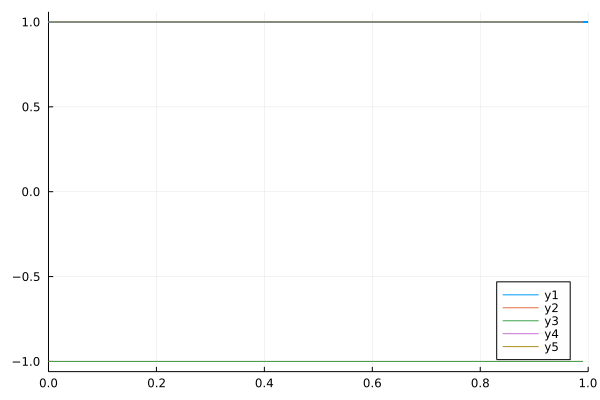

In [114]:
one(x)=1
plot(one,xlim=(0,1),legend=:topright, lw=2)
plot!(v,real(E[1,:]))
plot!(v,real(E[2,:])
,legend=:bottomright
#, ylim = (-1,2)
)
plot!(v,real(E[3,:]))
plot!(v,real(E[4,:]))
#plot!(v,real(E[5,:]))